In [2]:
import pandas as pd
df = pd.read_csv ('C:/Users/PC/Downloads/Electric_cars_dataset.csv')
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [4]:
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [5]:
df['County'].value_counts()

County
King         33552
Snohomish     6920
Pierce        4825
Clark         3771
Thurston      2446
             ...  
Duval            1
Wilson           1
Queens           1
Placer           1
Tipton           1
Name: count, Length: 139, dtype: int64

In [6]:
df.loc[df['County'].isnull(),'City'].value_counts()

City
FPO    3
APO    1
Name: count, dtype: int64

In [7]:
df.loc[(df['City'].isin(['FPO', 'APO'])) & df['County'].isna(), 'County'] = 'Military'

In [8]:
df['City'].value_counts()

City
SEATTLE          11887
BELLEVUE          3354
REDMOND           2448
VANCOUVER         2303
KIRKLAND          2086
                 ...  
ALISO VIEJO          1
SOUTH PRAIRIE        1
OCEAN CITY           1
DESERT AIRE          1
CHULA VISTA          1
Name: count, Length: 544, dtype: int64

In [9]:
df.loc[df['City'].isnull(),'ZIP Code'].value_counts()

ZIP Code
98052.0    2
98502.0    2
98346.0    1
98312.0    1
98513.0    1
98908.0    1
98008.0    1
Name: count, dtype: int64

In [10]:
df.loc[(df['ZIP Code'] == 98052.0) & (df['City'].isna()) , 'City'] = 'REDMOND'

In [11]:
df.loc[(df['ZIP Code'] == 98502.0) & (df['City'].isna()) , 'City'] = 'OLYMPIA'

In [12]:
df.loc[(df['ZIP Code'] == 98346.0) & (df['City'].isna()) , 'City'] = 'KINGSTON'

In [13]:
df.loc[(df['ZIP Code'] == 98312.0) & (df['City'].isna()) , 'City'] = 'BREMERTON'

In [14]:
df.loc[(df['ZIP Code'] == 98513.0) & (df['City'].isna()) , 'City'] = 'OLYMPIA'

In [15]:
df.loc[(df['ZIP Code'] == 98908.0) & (df['City'].isna()) , 'City'] = 'YAKIMA'

In [16]:
df.loc[(df['ZIP Code'] == 98008.0) & (df['City'].isna()) , 'City'] = 'BELLEVUE'

In [17]:
df['State'].value_counts()

State
WA    64168
CA       40
MD       22
VA       21
TX       11
OR        6
FL        5
NV        5
NC        5
PA        4
IL        4
HI        4
GA        4
DC        3
NE        3
TN        3
AP        3
NY        3
CT        3
MA        2
IN        2
NJ        2
MT        2
KS        2
NM        2
WI        1
LA        1
UT        1
SD        1
MO        1
AK        1
PR        1
AE        1
DE        1
WY        1
RI        1
MS        1
AZ        1
Name: count, dtype: int64

In [18]:
df.loc[df['State'].isnull(),'City'].value_counts()

City
LACEY                2
SEATTLE              2
EDMONDS              1
CHUGIAK              1
BOTHELL              1
BAINBRIDGE ISLAND    1
YAKIMA               1
VASHON               1
BREMERTON            1
Name: count, dtype: int64

In [19]:
df.loc[(df['City'] == 'LACEY') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'SEATTLE') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'EDMONDS') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'CHUGIAK') & (df['State'].isna()) , 'State'] = 'AK'
df.loc[(df['City'] == 'BOTHELL') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'BAINBRIDGE ISLAND') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'YAKIMA') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'VASHON') & (df['State'].isna()) , 'State'] = 'WA'
df.loc[(df['City'] == 'BREMERTON') & (df['State'].isna()) , 'State'] = 'WA'

In [20]:
df.loc[df['City'] == 'SEATTLE','ZIP Code'].value_counts()


ZIP Code
98115.0    1105
98103.0     897
98117.0     672
98112.0     653
98109.0     650
98105.0     598
98125.0     577
98118.0     572
98122.0     544
98144.0     533
98199.0     516
98107.0     418
98116.0     417
98104.0     375
98119.0     365
98102.0     351
98126.0     344
98121.0     310
98136.0     280
98101.0     260
98106.0     258
98133.0     249
98108.0     238
98178.0     214
98177.0     210
98146.0     168
98168.0      57
98134.0      42
98124.0       6
98164.0       4
98148.0       2
Name: count, dtype: int64

In [21]:
seattle_zip_codes = df.loc[df['City'] == 'SEATTLE', 'ZIP Code']
zip_code_mode = seattle_zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['City'] == 'SEATTLE') & (df['ZIP Code'].isna()), 'ZIP Code'] = mode_value


In [22]:
df.loc[df['City'] == 'SNOHOMISH','ZIP Code'].value_counts()

ZIP Code
98296.0    376
98290.0    342
Name: count, dtype: int64

In [23]:
zip_codes = df.loc[df['City'] == 'SPOKANE VALLEY', 'ZIP Code']
zip_code_mode = zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['City'] == 'SPOKANE VALLEY') & (df['ZIP Code'].isna()), 'ZIP Code'] = mode_value


In [24]:
zip_codes = df.loc[df['City'] == 'BOTHELL', 'ZIP Code']
zip_code_mode = zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['City'] == 'BOTHELL') & (df['ZIP Code'].isna()), 'ZIP Code'] = mode_value           

In [25]:
zip_codes = df.loc[df['City'] == 'SNOHOMISH', 'ZIP Code']
zip_code_mode = zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['City'] == 'SNOHOMISH') & (df['ZIP Code'].isna()), 'ZIP Code'] = mode_value 

In [26]:
zip_codes = df.loc[df['City'] == 'BAINBRIDGE ISLAND', 'ZIP Code']
zip_code_mode = zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['City'] == 'BAINBRIDGE ISLAND') & (df['ZIP Code'].isna()), 'ZIP Code'] = mode_value 

In [27]:
df['Model Year'].value_counts()

Model Year
2021.0    13175
2018.0     9750
2020.0     7504
2019.0     7382
2017.0     6841
2016.0     4425
2022.0     3911
2015.0     3481
2013.0     3354
2014.0     2642
2012.0     1235
2011.0      608
2008.0       14
2010.0       14
2000.0        4
2002.0        2
1999.0        2
1993.0        1
1998.0        1
Name: count, dtype: int64

In [28]:
df.loc[df['Model Year'].isnull(),'Model'].value_counts()

Model
MODEL 3                  3
SONATA PLUG-IN HYBRID    1
MODEL S                  1
MODEL Y                  1
A3                       1
Name: count, dtype: int64

In [29]:
df.loc[df['Model'] == 'SONATA PLUG-IN HYBRID', 'Model Year'].value_counts()

Model Year
2016.0    358
Name: count, dtype: int64

In [30]:
df.loc[(df['Model'] == 'SONATA PLUG-IN HYBRID') & (df['Model Year'].isna()) , 'Model Year'] = 2016

In [31]:
##le code pour les autres valeurs nulles 'Model Year' à faire
df.loc[df['Model'] == 'MODEL S', 'Model Year'].value_counts()

Model Year
2015.0    779
2016.0    690
2017.0    620
2018.0    603
2013.0    592
2014.0    470
2021.0    325
2020.0    253
2019.0    168
2022.0    105
2012.0    104
Name: count, dtype: int64

In [32]:
df['Make'].value_counts()

Make
TESLA                   27903
NISSAN                   8678
CHEVROLET                6651
FORD                     3850
KIA                      3066
BMW                      2707
TOYOTA                   2700
AUDI                     1265
VOLKSWAGEN               1217
CHRYSLER                 1091
HYUNDAI                   894
VOLVO                     688
FIAT                      561
HONDA                     528
PORSCHE                   455
JEEP                      436
MITSUBISHI                376
MINI                      303
MERCEDES-BENZ             248
SMART                     192
POLESTAR                  164
JAGUAR                    142
CADILLAC                   69
LINCOLN                    59
SUBARU                     34
LAND ROVER                 26
RIVIAN                     26
FISKER                     11
AZURE DYNAMICS              3
LUCID MOTORS                2
TH!NK                       1
DODGE                       1
WHEEGO ELECTRIC CARS        1
BENTL

In [33]:
df.loc[df['Make'].isnull(),'Model'].value_counts()

Model
LEAF       1
MODEL 3    1
NIRO       1
SORENTO    1
Name: count, dtype: int64

In [34]:
df.loc[(df['Model'] == 'LEAF') & (df['Make'].isna()) , 'Make'] = 'NISSAN'
df.loc[(df['Model'] == 'MODEL 3') & (df['Make'].isna()) , 'Make'] = 'TESLA'
df.loc[(df['Model'].isin(['NIRO', 'SORENTO'])) & (df['Make'].isna()), 'Make'] = 'KIA'

In [35]:
df.loc[df['Model'].isnull(),'Make'].value_counts()

Make
FORD    13
Name: count, dtype: int64

In [36]:
df.loc[df['Make']== 'FORD','Model'].value_counts()

Model
FUSION     1342
C-MAX      1064
F-150       673
MACH-E      517
FOCUS       192
ESCAPE       41
RANGER        7
$16.36K       1
Name: count, dtype: int64

In [37]:
zip_codes = df.loc[df['Make'] == 'FORD', 'Model']
zip_code_mode = zip_codes.mode()

# Vérifier si la mode est trouvée
if not zip_code_mode.empty:
    mode_value = zip_code_mode[0]
    
# Remplacer les valeurs manquantes avec la mode calculée
df.loc[(df['Make'] == 'FORD') & (df['Model'].isna()), 'Model'] = mode_value 

In [38]:
df['Legislative District'].value_counts()

Legislative District
41.0    4292
45.0    4160
48.0    3786
36.0    3047
46.0    2782
43.0    2749
1.0     2607
5.0     2604
37.0    2092
34.0    2041
22.0    1682
18.0    1664
32.0    1588
40.0    1578
23.0    1575
21.0    1491
44.0    1468
11.0    1415
26.0    1289
10.0    1229
17.0    1076
31.0    1025
42.0     984
24.0     976
47.0     976
27.0     966
49.0     930
35.0     918
33.0     862
28.0     833
39.0     813
30.0     730
2.0      704
8.0      697
38.0     642
20.0     623
25.0     608
6.0      580
12.0     573
4.0      474
19.0     414
13.0     402
29.0     397
14.0     387
9.0      341
3.0      340
16.0     330
7.0      282
15.0     156
0.0        6
Name: count, dtype: int64

In [39]:
df.loc[df['Legislative District'].isnull(),'City'].value_counts()

City
SAN DIEGO      10
ALEXANDRIA      4
SAN ANTONIO     3
WOODBRIDGE      3
WASHINGTON      3
               ..
GLENELG         1
CHEYENNE        1
STAFFORD        1
KOKOMO          1
CHULA VISTA     1
Name: count, Length: 134, dtype: int64

In [40]:
df.loc[df['City'] == 'WASHINGTON', 'Legislative District']

10924   NaN
22767   NaN
35072   NaN
Name: Legislative District, dtype: float64

In [41]:
df.loc[(df['City'] == 'SAN DIEGO') & (df['Legislative District'].isna()) , 'Legislative District'] = 39
df.loc[(df['City'] == 'ALEXANDRIA') & (df['Legislative District'].isna()) , 'Legislative District'] = 8
df.loc[(df['City'] == 'WOODBRIDGE') & (df['Legislative District'].isna()) , 'Legislative District'] = 19
df.loc[(df['City'] == 'SAN ANTONIO') & (df['Legislative District'].isna()) , 'Legislative District'] = 6

In [42]:
df['Electric Utility'].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               22555
PUGET SOUND ENERGY INC                                                                      12790
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                12514
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                             3768
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              2899
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)                                      2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
AVISTA CORP||INLAND POWER & LIGHT COMPANY                                                       1
CIT

In [43]:

df = df.drop(['ID'], axis = 1 )


In [44]:
df = df[df['Expected Price ($1k)'] != 'N/']

In [45]:
df['Expected Price ($1k)'] = df['Expected Price ($1k)'].astype(float)

In [46]:
for column in df :
   df[column].fillna(df[column].mode()[0], inplace=True)


In [47]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['VIN (1-10)','County','City','State','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility']
le=LabelEncoder()
for column in categorical_columns:
    df[column]=le.fit_transform(df[column])
df.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,1902,121,271,35,98037.0,2020.0,28,57,0,0,308,0,32.0,109821694,318,65,50.00
1,3055,119,38,35,98229.0,2011.0,22,53,0,0,73,0,40.0,137375528,380,65,15.00
2,4670,96,473,35,98422.0,2015.0,3,45,0,0,81,0,27.0,150627382,372,20,18.00
3,624,60,391,35,98053.0,2013.0,5,96,1,0,38,0,45.0,258766301,245,66,33.90
4,306,96,380,35,98375.0,2019.0,5,15,0,0,238,0,25.0,296998138,338,16,41.78


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                                                   VIN (1-10)    County  \
VIN (1-10)                                           1.000000 -0.030166   
County                                              -0.030166  1.000000   
City                                                -0.001131 -0.177954   
State                                                0.008562 -0.001766   
ZIP Code                                             0.001753  0.021788   
Model Year                                           0.162104 -0.039252   
Make                                                 0.218453 -0.035393   
Model                                                0.056755  0.004737   
Electric Vehicle Type                                0.049396  0.023359   
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.240546  0.009292   
Electric Range                                      -0.128139 -0.024092   
Base MSRP                                            0.143668  0.001337   
Legis

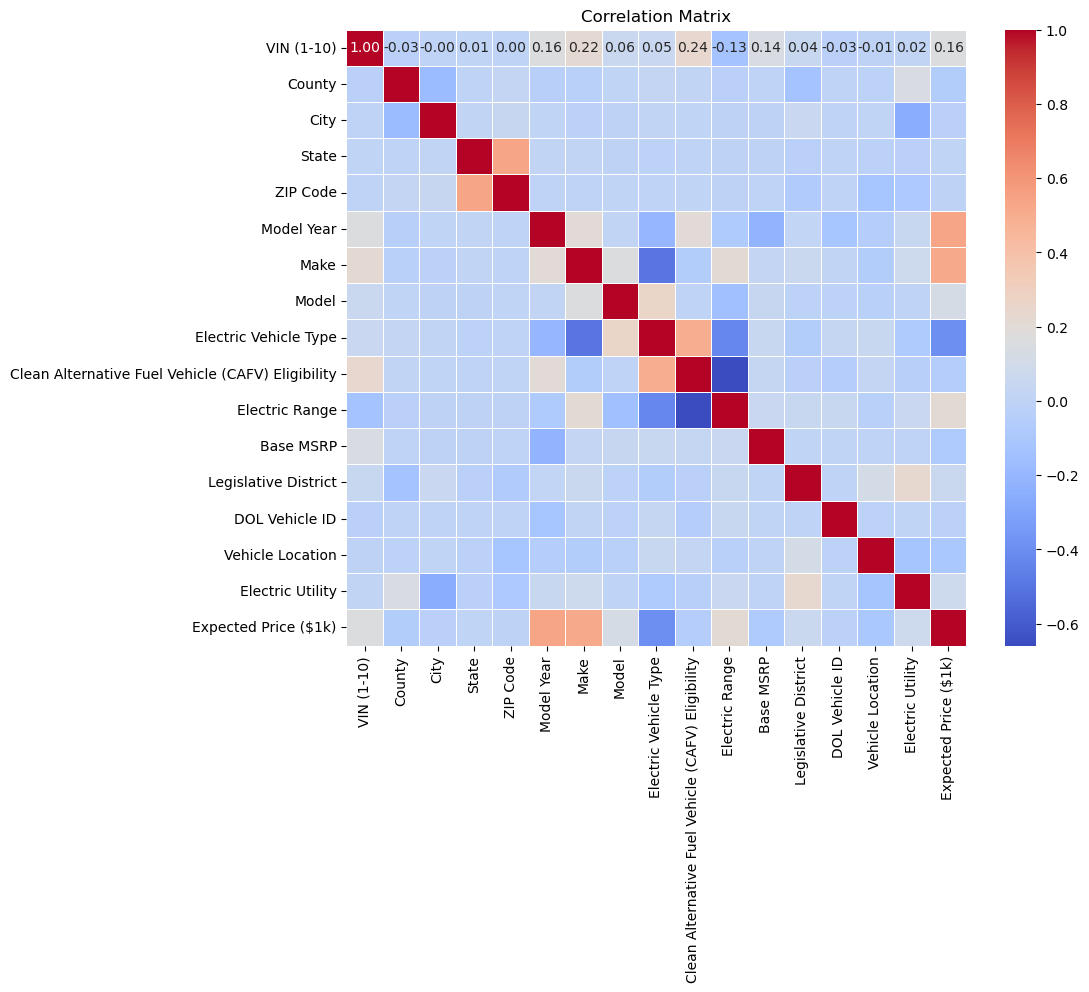

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64340 entries, 0 to 64352
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         64340 non-null  int32  
 1   County                                             64340 non-null  int32  
 2   City                                               64340 non-null  int32  
 3   State                                              64340 non-null  int32  
 4   ZIP Code                                           64340 non-null  float64
 5   Model Year                                         64340 non-null  float64
 6   Make                                               64340 non-null  int32  
 7   Model                                              64340 non-null  int32  
 8   Electric Vehicle Type                              64340 non-null  int32  
 9   Clean Alter

In [57]:
features = df.drop(['Expected Price ($1k)','County','City','State','Base MSRP','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility','ZIP Code','DOL Vehicle ID','Legislative District','Vehicle Location'], axis =1)
x= features.values
y= df['Expected Price ($1k)'].values


In [58]:
features.head()

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,1902,2020.0,28,57,0,308
1,3055,2011.0,22,53,0,73
2,4670,2015.0,3,45,0,81
3,624,2013.0,5,96,1,38
4,306,2019.0,5,15,0,238


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30) 
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))